<a href="https://colab.research.google.com/github/ShakthivelNadar/Sentiment-Analysis-for-Product-Review/blob/main/SentimentAnalysisforProductReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/1429_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

/tmp/ipython-input-2141311941.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/MyDrive/1429_1.csv")


In [3]:
df1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
cols = ['reviews.text', 'reviews.rating']

df1 = df1[cols]
df2 = df2[cols]
df3 = df3[cols]

df = pd.concat([df1, df2, df3], ignore_index=True)
df.dropna(inplace=True)

In [5]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)

    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.text not in stop_words and len(token.text) > 2
    ]

    return " ".join(tokens)

In [7]:
df['cleaned_review'] = df['reviews.text'].apply(clean_text)


In [8]:
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2)
)

X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [10]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9548263684520306
F1 Score: 0.9484325886978335


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.64      0.73       502
     neutral       0.76      0.37      0.50       580
    positive       0.96      0.99      0.98     12510

    accuracy                           0.95     13592
   macro avg       0.86      0.67      0.73     13592
weighted avg       0.95      0.95      0.95     13592



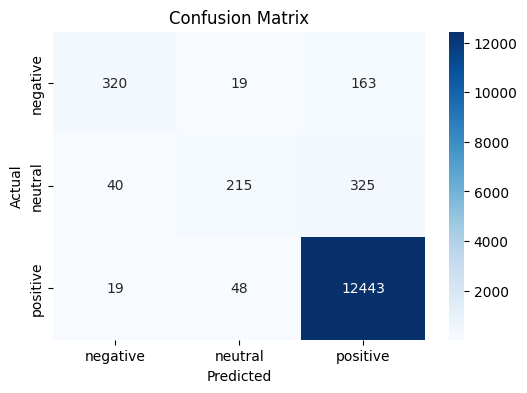

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
y_test_array = y_test.to_numpy()


In [15]:
df = df.reset_index(drop=True)


In [16]:
X = tfidf.fit_transform(df['reviews.text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
test_df = df.loc[y_test.index].copy()

misclassified = test_df[y_test.values != y_pred]


In [19]:
misclassified[['reviews.text', 'sentiment']].head(10)


,reviews.text,sentiment
9835,"The price was low, but the ads are really anno...",neutral
13992,"had a fire HD, got this to try, spend the extr...",neutral
47329,They die pretty quickly.,neutral
46353,they are not good as described. the power is e...,negative
13119,Works as good as it should for the price. Its ...,neutral
30278,"it does what its supposed to do, turn ur tv in...",neutral
6763,Got this on sale during Black Friday. Great li...,neutral
25194,I have two Google home devices. They seem to b...,negative
32315,Was tired of getting ripped off by Greenlight ...,neutral
60100,Have owned IOS products as long as I can remem...,negative
